In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)

# Function 1
# Load CSV into dictionary
data = pd.read_csv('data.csv', header=0, keep_default_na=False)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(7212, 19)
['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city', 'borough', 'neighborhood', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'last_modified', 'latitude', 'longitude', 'location']


In [2]:
data.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,1133718,1280,6219420,Shared room,,Singapore,,MK03,9,4.5,12,1,,74,,2017-05-17 9:10:25,1.293354,103.769226,0101000020E6100000E84EB0FF3AF159409C69C2F693B1...
1,3179080,1280,15295886,Shared room,,Singapore,,TS17,15,5.0,12,1,,77,,2017-05-17 9:10:24,1.310862,103.858828,0101000020E6100000E738B709F7F659403F1BB96E4AF9...
2,15303457,1280,97053568,Shared room,,Singapore,,MK05,0,0.0,14,1,,60,,2017-05-17 9:10:17,1.333744,103.764612,0101000020E610000044882B67EFF0594093C7D3F20357...
3,13902389,1280,6219420,Shared room,,Singapore,,MK03,0,0.0,12,1,,30,,2017-05-17 9:10:15,1.294119,103.769178,0101000020E61000005FB35C363AF15940971DE21FB6B4...
4,13902391,1280,6219420,Shared room,,Singapore,,MK03,1,0.0,12,1,,30,,2017-05-17 9:10:15,1.292766,103.768432,0101000020E6100000CB4C69FD2DF159407F17B6662BAF...


In [3]:
# Function 2
# 1. What are the top 10 priciest rooms in Singapore? List the room_id as well as price
df2 = pd.DataFrame(data, columns=['room_id','price'])
df2.nlargest(10, 'price')

,room_id,price
426,16395877,8023
392,9815599,3309
391,13117403,3029
428,17794853,2206
429,14620083,2164
427,16327246,2059
430,5775503,1103
432,12372683,1029
434,15861144,1027
439,9020629,981


In [4]:
# 2. Which hosts in Singapore have got more than 30 rooms? How many of such hosts do we have? 
# (Note: Each host can have more than one property listed, which in turn has varying number of rooms)
host_rooms = pd.DataFrame(data, columns=['host_id','room_id'])
hostGroup = host_rooms.groupby(['host_id'])
pd.DataFrame(hostGroup.size())

,0
host_id,
23666,1
59498,3
86990,3
90415,1
125862,1
129623,14
153625,1
184092,1
184596,1


In [5]:
# 3. What are the different room types, and how many of each room types are there in Singapore?
pd.DataFrame(data.room_type.unique())
room_types = pd.DataFrame(data, columns=['room_type','room_id'])
roomTypeGroups = room_types.groupby(['room_type'])
pd.DataFrame(roomTypeGroups.size())

,0
room_type,
Entire home/apt,3497
Private room,3407
Shared room,308


In [6]:
# 4.What are the top 10 most reviewed rooms?
rooms = pd.DataFrame(data, columns=['room_id','reviews'])
pd.DataFrame(rooms).nlargest(10, 'reviews')

,room_id,reviews
4990,2009135,195
6293,2357514,162
2662,3586966,160
293,6534296,157
2644,2129215,157
2481,4108082,152
3267,4917556,150
3328,6815242,145
6766,1982064,141
4096,4069940,139


In [7]:
# 5.What are the top 10 rooms with the highest overall satisfaction?
roomsOverallSatisf = pd.DataFrame(data, columns=['room_id','overall_satisfaction'])
pd.DataFrame(roomsOverallSatisf).nlargest(10, 'overall_satisfaction')

,room_id,overall_satisfaction
1,3179080,5.0
17,8626676,5.0
40,15089063,5.0
63,10443717,5.0
83,9928402,5.0
113,5676325,5.0
126,16863370,5.0
145,5289692,5.0
149,16524551,5.0
155,15362734,5.0


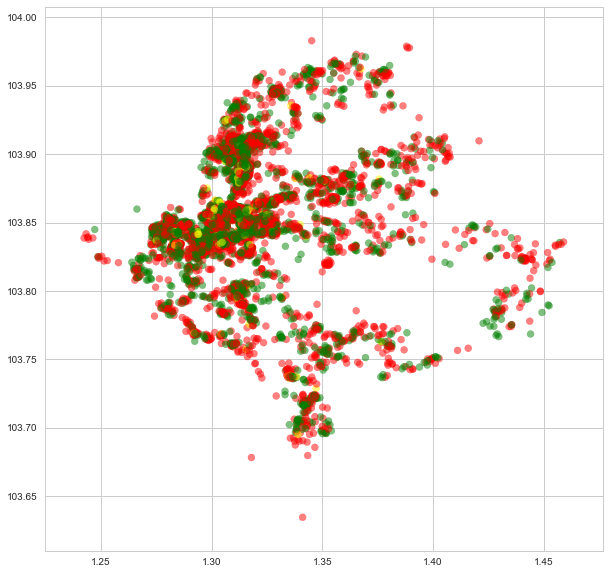

In [18]:
import matplotlib.colors
# Function 3: Satisfaction Map
# Create a new column names satisfaction_category >4: high >2.5: average <2.5 unsatisfactory
# use lat and long as x,y plots
# satisfactory category legend:
# unsatisfactory: red
# average: grey
# high: green
df = pd.DataFrame(data)
data['satisfaction_category']=np.where(data['overall_satisfaction']<=2.5, 'red', np.where(data['overall_satisfaction']<4, 'yellow', 'green'))
# scatterPlotData = pd.DataFrame(data, columns=['latitude','longitude','satisfaction_category'])
satisfactionPlotX = list(data.latitude)
satisfactionPlotY = list(data.longitude)
satisfactionColor = list(data.satisfaction_category)
 
plt.scatter(satisfactionPlotX, satisfactionPlotY, c=satisfactionColor, alpha=0.5)

#hi = list(pd.DataFrame(df[(data['satisfaction_category']=='red')], columns=['satisfaction_category']))
#av = pd.DataFrame(df[(data['satisfaction_category']=='yellow')], columns=['satisfaction_category'])
#un = pd.DataFrame(df[(data['satisfaction_category']=='blue')], columns=['satisfaction_category'])

#plt.legend([hi, av, un], ['High', 'Average', 'Unsatisfactory'])
#plt.legend()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [9]:
# Function 4: Basic Machine Learning Models
# 1. Using any method you prefer, find out which variable provides the greatest explanation 
# for the overall satisfaction of customers.
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


C:\Users\ethan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
